# Assignment-2:
# Abdelrahman Sayed_______20201114
# Seif El-Din Mohamed_____20200239
# Shahd Fekry ali_________20201101
# Mariam Alaa Eldeen______20200525
# Wessam Fawzy____________20201215


# Problem-1


## Import Libraries

In [14]:
import pandas as pd  # Pandas for data manipulation
from sklearn.model_selection import train_test_split  # Train-test split for model evaluation
from sklearn.tree import DecisionTreeClassifier  # Decision tree classifier for modeling
from sklearn.metrics import accuracy_score  # Metric for evaluating model performance
from sklearn.compose import ColumnTransformer  # Used for transforming specific columns
from sklearn.preprocessing import OneHotEncoder  # One-hot encoding for categorical variables
import numpy as np  # NumPy for numerical operations
from sklearn.preprocessing import LabelEncoder  # Label encoding for categorical variables
import matplotlib.pyplot as plt  # Matplotlib for plotting

## import Data from Dataset

In [15]:
dataset = pd.read_csv('drug.csv') # Read the dataset from a CSV file named 'drug.csv' using Pandas


## Data Preprocessing

### Count Missing Values Occurs

In [16]:
missing_values = dataset.isnull().sum() # Check for missing values in the dataset
print("Missing Values:\n", missing_values) # Print the count of missing values for each column

Missing Values:
 Age            0
Sex            0
BP             2
Cholesterol    2
Na_to_K        1
Drug           0
dtype: int64


### Handling Missing Data Features

In [17]:
# We Will Drop Records which have no BP and cholestrol Features
dataset.dropna(subset=['BP', 'Cholesterol'], inplace=True)

# Then We Will Fill Records has no Na_to_K Feature with Average of Na_to_K Values
dataset['Na_to_K'].fillna(dataset['Na_to_K'].mean(), inplace=True)


### Double-Check Missing Features


In [18]:
missing_values = dataset.isnull().sum() # Check for missing values in the dataset
print("Missing Values:\n", missing_values) # Print the count of missing values for each column

Missing Values:
 Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64


### Split Dataset Into Feature set and Target set

In [19]:
# Extract the feature matrix (X) and target variable (Y) from the dataset
X = dataset.iloc[:, :-1].values  # Features (all columns except the last one)
Y = dataset.iloc[:, -1].values   # Target variable (last column)

# Display the feature matrix (X)
print("Feature Matrix (X):\n", X)


Feature Matrix (X):
 [[23 'F' 'HIGH' 'HIGH' 25.355]
 [47 'M' 'LOW' 'HIGH' 13.093]
 [47 'M' 'LOW' 'HIGH' 10.114]
 [28 'F' 'NORMAL' 'HIGH' 16.08220512820512]
 [61 'F' 'LOW' 'HIGH' 18.043]
 [22 'F' 'NORMAL' 'HIGH' 8.607]
 [49 'F' 'NORMAL' 'HIGH' 16.275]
 [41 'M' 'LOW' 'HIGH' 11.037]
 [60 'M' 'NORMAL' 'HIGH' 15.171]
 [47 'F' 'LOW' 'HIGH' 11.767]
 [34 'F' 'HIGH' 'NORMAL' 19.199]
 [43 'M' 'LOW' 'HIGH' 15.376]
 [74 'F' 'LOW' 'HIGH' 20.942]
 [50 'F' 'NORMAL' 'HIGH' 12.703]
 [16 'F' 'HIGH' 'NORMAL' 15.516]
 [69 'M' 'LOW' 'NORMAL' 11.455]
 [43 'M' 'HIGH' 'HIGH' 13.972]
 [23 'M' 'LOW' 'HIGH' 7.298]
 [32 'F' 'HIGH' 'NORMAL' 25.974]
 [57 'M' 'LOW' 'NORMAL' 19.128]
 [63 'M' 'NORMAL' 'HIGH' 25.917]
 [47 'M' 'LOW' 'NORMAL' 30.568]
 [48 'F' 'LOW' 'HIGH' 15.036]
 [33 'F' 'LOW' 'HIGH' 33.486]
 [28 'F' 'HIGH' 'NORMAL' 18.809]
 [31 'M' 'HIGH' 'HIGH' 30.366]
 [49 'F' 'NORMAL' 'NORMAL' 9.381]
 [39 'F' 'LOW' 'NORMAL' 22.697]
 [45 'M' 'LOW' 'HIGH' 17.951]
 [18 'F' 'NORMAL' 'NORMAL' 8.75]
 [74 'M' 'HIGH' 'HIGH'

### Encode Categorical Data in Features (One-Hot Encoding)

In [20]:
# Define a ColumnTransformer for applying transformations to specific columns
# - 'encoder': OneHotEncoder is used for one-hot encoding
# - [1, 2, 3]: Columns 1, 2, and 3 are one-hot encoded, specified by their indices
# - 'remainder': 'passthrough' indicates that the remaining columns are passed through without any transformations
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [1, 2, 3])], remainder='passthrough')

# Apply the transformations defined by ColumnTransformer to the feature matrix (X)
X = np.array(ct.fit_transform(X))


### Encode Target Data (Label Encoding)

In [21]:
le = LabelEncoder() # Use LabelEncoder to encode the target variable (Y)


Y = np.array(le.fit_transform(Y)) # Transform and overwrite the original target variable (Y) with encoded values

# Display the Target matrix (Y)
Y

array([4, 2, 2, 3, 4, 3, 4, 2, 4, 2, 4, 4, 4, 3, 4, 3, 0, 2, 4, 4, 4, 4,
       4, 4, 4, 4, 3, 4, 4, 3, 1, 3, 4, 3, 3, 0, 3, 3, 3, 4, 1, 4, 3, 3,
       3, 0, 2, 4, 4, 4, 3, 4, 4, 1, 2, 1, 4, 3, 4, 4, 0, 4, 3, 1, 4, 0,
       3, 4, 4, 1, 4, 3, 4, 4, 4, 0, 4, 0, 3, 1, 3, 2, 0, 2, 1, 3, 4, 4,
       4, 4, 4, 4, 4, 4, 3, 4, 4, 4, 4, 0, 0, 2, 3, 4, 3, 3, 4, 1, 4, 0,
       3, 3, 3, 3, 4, 3, 3, 0, 4, 4, 4, 4, 1, 4, 4, 3, 4, 3, 4, 4, 3, 4,
       4, 3, 1, 0, 1, 3, 0, 4, 1, 4, 0, 3, 3, 0, 3, 2, 0, 1, 3, 3, 4, 2,
       0, 4, 2, 3, 3, 1, 3, 4, 4, 4, 4, 3, 4, 0, 3, 3, 4, 0, 4, 0, 4, 4,
       4, 4, 3, 3, 4, 4, 4, 1, 0, 4, 4, 4, 0, 4, 2, 4, 2, 2, 3, 3])

## 1st Experiment

In [22]:
# Define a list of random states which have high variance to ensure Randomization Facotr
random_states = [1736,0, 123, 789, 987, 654]

# Intialize Indicator Variables with -ve values to detect the maximum Accuracy, best experiment, Tree size of the best experiment and highst accuracy 
max_accuracy = -100
best_experiment = 0
best_treesize = -1

# Loop Over Random States
for i in range(5):
    
    # Split the dataset into training and testing sets using a random state
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=random_states[i])
    
    # Create and train a Decision Tree Classifier model
    model = DecisionTreeClassifier()
    model.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = model.predict(X_test)

    # Calculate and print the accuracy of the current experiment
    accuracy = accuracy_score(y_test, y_pred)
    
    # Update variables if the current experiment has higher accuracy
    if accuracy >= max_accuracy:
        max_accuracy = accuracy
        best_experiment = i+1
        best_treesize = model.tree_.node_count

    # Print Each Experiment with It's Accuracy and Tree Size
    print(f"Experiment {i+1} with Tree Size: {model.tree_.node_count} and Accuracy: {accuracy}")

print("\n")
# Print Details of Experiment hasing best accuracy
print(f"Best Experiment: {best_experiment}\nAccuracy: {max_accuracy}\nTree Size: {best_treesize}")


Experiment 1 with Tree Size: 15 and Accuracy: 1.0
Experiment 2 with Tree Size: 15 and Accuracy: 0.9661016949152542
Experiment 3 with Tree Size: 15 and Accuracy: 0.9322033898305084
Experiment 4 with Tree Size: 11 and Accuracy: 0.9661016949152542
Experiment 5 with Tree Size: 15 and Accuracy: 0.9661016949152542


Best Experiment: 1
Accuracy: 1.0
Tree Size: 15


In [23]:
def run_decision_tree_experiment(X, Y, random_states, trn_size):
    
    accuracies = []
    tree_sizes = []

    for i in range(len(random_states)):
        # Split the dataset into training and testing sets using a random state
        X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 1-trn_size, random_state=random_states[i])

        # Create and train a Decision Tree Classifier model
        model = DecisionTreeClassifier()
        model.fit(X_train, y_train)

        # Make predictions on the test set
        y_pred = model.predict(X_test)

        # Calculate accuracy of the current experiment
        accuracy = accuracy_score(y_test, y_pred)
        accuracies.append(accuracy)
        tree_sizes.append(model.tree_.node_count)

    # Return details of the best experiment as a tuple
    return np.mean(accuracies), np.max(accuracies) ,np.min(accuracies),np.mean(tree_sizes),np.max(tree_sizes),np.min(tree_sizes)

## 2nd Experiment


   Training Set Size  Mean Accuracy  Max Accuracy  Min Accuracy  \
0                0.3       0.980676      0.992754      0.949275   
1                0.4       0.980226      0.991525      0.949153   
2                0.5       0.977891      1.000000      0.938776   
3                0.6       0.972574      1.000000      0.924051   
4                0.7       0.960452      1.000000      0.898305   

   Mean Tree Size  Max Tree Size  Min Tree Size  
0       12.333333             15             11  
1       13.666667             15             11  
2       13.666667             15             11  
3       13.666667             15             11  
4       13.666667             15             11  


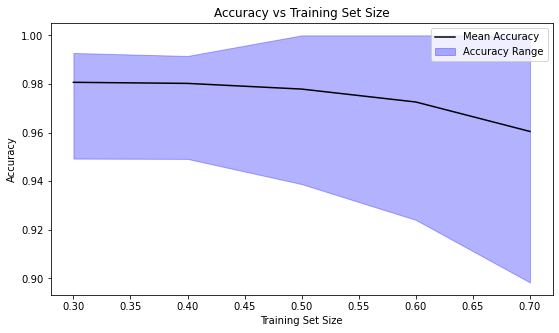

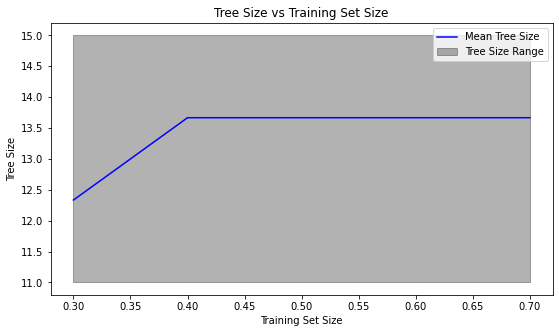

In [24]:
train_size = 0.3

# Initialize lists to store statistics
mean_accuracies = []
max_accuracies = []
min_accuracies = []
mean_tree_sizes = []
max_tree_sizes = []
min_tree_sizes = []

# Loop through different training set sizes using while loop
while train_size <= 0.7:
    
    a_mean, a_max, a_min, t_mean, t_max, t_min = run_decision_tree_experiment(X,Y,random_states,train_size)
    
    # Calculate mean, max, and min statistics for the current training set size
    mean_accuracies.append(a_mean) # Append Mean of each experiment with specific train_size
    max_accuracies.append(a_max)
    min_accuracies.append(a_min)
    mean_tree_sizes.append(t_mean)
    max_tree_sizes.append(t_max)
    min_tree_sizes.append(t_min)

    # Increment training_size
    train_size += 0.1

# Display the statistics
report = pd.DataFrame({
    'Training Set Size': [0.3, 0.4, 0.5, 0.6, 0.7],
    'Mean Accuracy': mean_accuracies,
    'Max Accuracy': max_accuracies,
    'Min Accuracy': min_accuracies,
    'Mean Tree Size': mean_tree_sizes,
    'Max Tree Size': max_tree_sizes,
    'Min Tree Size': min_tree_sizes
})

print(report)

# Define the size of the first plot (accuracy plot) to be 9 units in width and 5 units in height
plt.figure(figsize=(9, 5))

# Create a line plot for mean accuracy with black color and add a legend label
plt.plot([0.3, 0.4, 0.5, 0.6, 0.7], mean_accuracies, label='Mean Accuracy', color='black')

# Fill the area between the minimum and maximum accuracy curves with blue color and transparency, and add a legend label
plt.fill_between([0.3, 0.4, 0.5, 0.6, 0.7], min_accuracies, max_accuracies, alpha=0.3, color='blue', label='Accuracy Range')

# Set the title of the accuracy plot
plt.title('Accuracy vs Training Set Size')

# Label the x-axis as 'Training Set Size'
plt.xlabel('Training Set Size')

# Label the y-axis as 'Accuracy'
plt.ylabel('Accuracy')

# Display the legend in the plot
plt.legend()

# Show the accuracy plot
plt.show()

# Define the size of the second plot (tree size plot) to be 9 units in width and 5 units in height
plt.figure(figsize=(9, 5))

# Create a line plot for mean tree size with blue color and add a legend label
plt.plot([0.3, 0.4, 0.5, 0.6, 0.7], mean_tree_sizes, label='Mean Tree Size', color='blue')

# Fill the area between the minimum and maximum tree size curves with black color and transparency, and add a legend label
plt.fill_between([0.3, 0.4, 0.5, 0.6, 0.7], min_tree_sizes, max_tree_sizes, alpha=0.3, color='black', label='Tree Size Range')

# Set the title of the tree size plot
plt.title('Tree Size vs Training Set Size')

# Label the x-axis as 'Training Set Size'
plt.xlabel('Training Set Size')

# Label the y-axis as 'Tree Size'
plt.ylabel('Tree Size')

# Display the legend in the plot
plt.legend()

# Show the tree size plot
plt.show()


# Problem 2

### KNN Class

In [25]:


class KNN():

    def __init__(self) -> None:
        self.train=list()

    def __distance(self,testRow,trainRow):
        distance = 0.0
        for i in range(len(testRow)-1):
            distance += (testRow[i] - trainRow[i])**2
        return distance**(1/2) 


    def __KDist(self,testRow, k):
        allDistances = list()
        for trainRow in self.train:
                dist = self.__distance(testRow, trainRow)
                allDistances.append((trainRow, dist))
                allDistances.sort(key=lambda tup: tup[1])
        neighborsDistances=allDistances[:k]
        return neighborsDistances   #Tuples of k neighbors and their distances
    

    def predict(self, testRow, k):
        nwd = self.__KDist(testRow, k)
        total_weighted_votes = {}
        total_weights = 0

        for neighbor, dist in nwd:
            weight = 1 / (dist + 0.000001) #to not divide by 0
            total_weights += weight

            class_label = neighbor[-1]

            if class_label in total_weighted_votes:
                total_weighted_votes[class_label] += weight
            else:
                total_weighted_votes[class_label] = weight

        normalized_votes = {label: weight / total_weights for label, weight in total_weighted_votes.items()} #Weight of every class divided by total weights of both classes
        return max(normalized_votes, key=normalized_votes.get) #Max voted class

    def evaluation(self,true, predicted):
        correctPredictions = 0

        for i in range(len(true)):
            if true[i] == predicted[i]:
                correctPredictions += 1
        return correctPredictions
        
    def fit(self,train, test, k):
        self.train=train
        allPredicted = list()
        for row in test:
            prediction = self.predict(row, k)
            allPredicted.append(prediction)
        trueValues = [row[-1] for row in test]
        corr=self.evaluation(trueValues,allPredicted)
        print("Model fit successfully using:- \nK: {}\nCorrect predicitons: {}\nTest set instances: {}\nAccuracy: {}%".format(k,corr,len(test),str(round(corr / len(test) * 100,2))))
        


### Preprocessing Class

In [26]:
class preprocessing():

    def train_test_split(dataset,ratio):
        
        ratio_idx=round(1-ratio*len(dataset))
        train = dataset[:ratio_idx]
        test = dataset[ratio_idx:]
        return train, test
    
    def normalization(dataset):

        features = [list(map(float, row[:-1])) for row in dataset]
        labels = [row[-1] for row in dataset]

        features_transposed = list(map(list, zip(*features)))

        # Normalization min max
        normalized_features = []
        for feature_values in features_transposed:
            min_value = min(feature_values)
            max_value = max(feature_values)
            normalized_feature = [(float(value) - min_value) / (max_value - min_value) for value in feature_values]
            normalized_features.append(normalized_feature)

        normalized_features = list(map(list, zip(*normalized_features)))

        normalized_dataset = [normalized_feature + [label] for normalized_feature, label in zip(normalized_features, labels)]

        return normalized_dataset

### Pandas Class

In [27]:
class pd:
    
    def read_csv(filename,header=True):
        with open(filename, 'r') as f:
            if header:
                next(f)
            results = []
            for line in f:
                line= line.strip()
                words = line.split(',')
                results.append(words)

        return results

### Load The Dataset

In [28]:
dataset=pd.read_csv('diabetes.csv')

###  Normalize each feature column separately for training and test objects using Log Transformation or Min-Max Scaling

In [29]:
dataset=preprocessing.normalization(dataset)

### Split Dataset into Train and Test 

In [30]:
train,test=preprocessing.train_test_split(dataset,0.3)

### Train The KNN Classifier

In [31]:
knn=KNN()
knn.fit(train,test,5)

Model fit successfully using:- 
K: 5
Correct predicitons: 173
Test set instances: 229
Accuracy: 75.55%


### Train With Different values for K 

In [32]:
for k in [3,6,9,12,14]:
    knn.fit(train,test,k)
    print('─' * 20)

Model fit successfully using:- 
K: 3
Correct predicitons: 175
Test set instances: 229
Accuracy: 76.42%
────────────────────
Model fit successfully using:- 
K: 6
Correct predicitons: 176
Test set instances: 229
Accuracy: 76.86%
────────────────────
Model fit successfully using:- 
K: 9
Correct predicitons: 171
Test set instances: 229
Accuracy: 74.67%
────────────────────
Model fit successfully using:- 
K: 12
Correct predicitons: 177
Test set instances: 229
Accuracy: 77.29%
────────────────────
Model fit successfully using:- 
K: 14
Correct predicitons: 178
Test set instances: 229
Accuracy: 77.73%
────────────────────
